In [234]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [223]:
msgs=pd.read_csv('../Datasets Repository/spam.csv',encoding='latin-1')

Basic Data Pre processing

In [224]:
msgs=msgs[['v1','v2']]
msgs.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [225]:
def spam_ham(s):
    if s=='ham':
        return 0
    else:
        return 1
msgs['v1']=msgs['v1'].apply(lambda x: spam_ham(x)) 
msgs.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [229]:
msgs.rename(columns={'v1':'Label','v2':'Message'},inplace=True)
msgs.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [230]:
msgs['Label'].value_counts()

0    4825
1     747
Name: Label, dtype: int64

Analyzing Dataset Based On Word Count

In [232]:
msgs['No Of Words']=msgs['Message'].apply(lambda x: len(str(x).split(' ')))
msgs.head()

,Label,Message,No Of Words
0,0,"go until jurong point, crazy.. available only ...",20
1,0,ok lar... joking wif u oni...,6
2,1,free entry in 2 a wkly comp to win fa cup fina...,28
3,0,u dun say so early hor... u c already then say...,11
4,0,"nah i don't think he goes to usf, he lives aro...",13


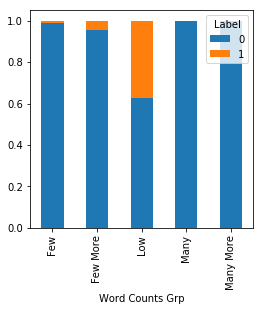

In [233]:
msgs['No Of Words'].unique()
Bins=[0,5,20,50,100,200]
grps=['Low','Few','Few More','Many','Many More']
msgs['Word Counts Grp']=pd.cut(msgs['No Of Words'],Bins,labels=grps)
Ic=pd.crosstab(msgs['Word Counts Grp'],msgs['Label'])
Ic.div(Ic.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

From above plot  We can infer that lesser the words more probable that it is spam

Build the Algorithm

In [235]:
CV=CountVectorizer(stop_words='english')
model=CV.fit_transform(msgs['Message'])
X=model.toarray()
Y=msgs['Label'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
MBmodel=MultinomialNB()
MBmodel.fit(X_train,Y_train)
print('Classification score:',MBmodel.score(X_test,Y_test))

Classification score: 0.9820531227566404


In [236]:
def Is_It_Spam_or_Ham(sms,Vectmodel,PredModel):
    sms=[sms]
    sms_vector=Vectmodel.transform(sms)
    if PredModel.predict(sms_vector)[0]==0:
        return 'This SMS is Ham'
    else:
        return 'This Message is Spam'

Is_It_Spam_or_Ham('Congrats!  Free. Free..You  have Won a 30 Million Lucky Draw. Send Your details to above mentioned E mail to get the prize',CV,MBmodel)

'This Message is Spam'

In [245]:
from sklearn.ensemble import AdaBoostClassifier
ABmodel=AdaBoostClassifier()
ABmodel.fit(X_train,Y_train)
print('Classification score:',MBmodel.score(X_test,Y_test))

Classification score: 0.9820531227566404


Surprisingly AdaBoost Calsssifier also given same acuracy as MultiNomial Calssifier. But As Multi Nomial classifier took lesser training time, as a Trade Off
we choose Multinomial from Naive basyes as our model 

EXTRA NOTES :Word Cloud Visualization

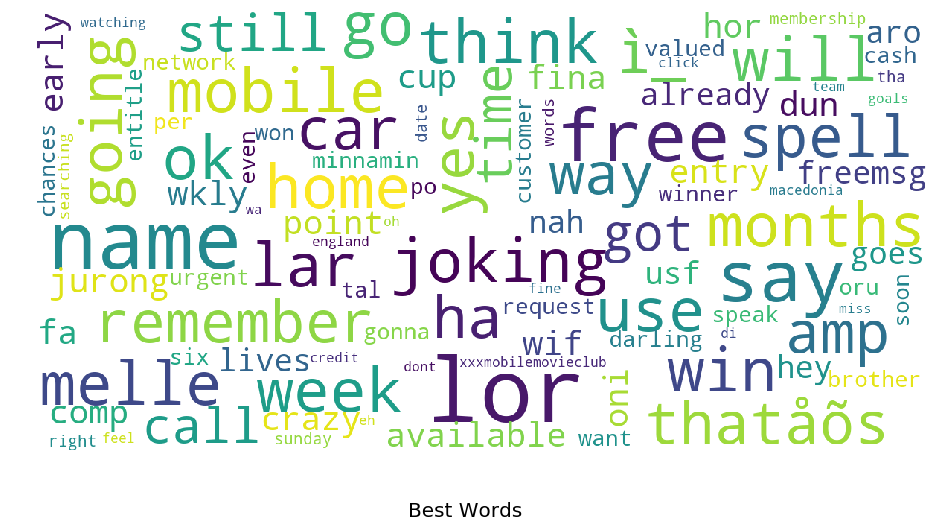

In [237]:
from wordcloud import WordCloud,STOPWORDS
stop=set(STOPWORDS)
def ShowWordCloud(DataFeed,title=None):
    wordcloud=WordCloud(background_color='white',
                        stopwords=stop,max_words=100,
                        max_font_size=40,scale=3,random_state=1).generate(str(DataFeed))
    fig=plt.figure(1,figsize=(16,16))
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
        plt.imshow(wordcloud)
        plt.show()
        
ShowWordCloud(msgs['Message'],title='Best Words')


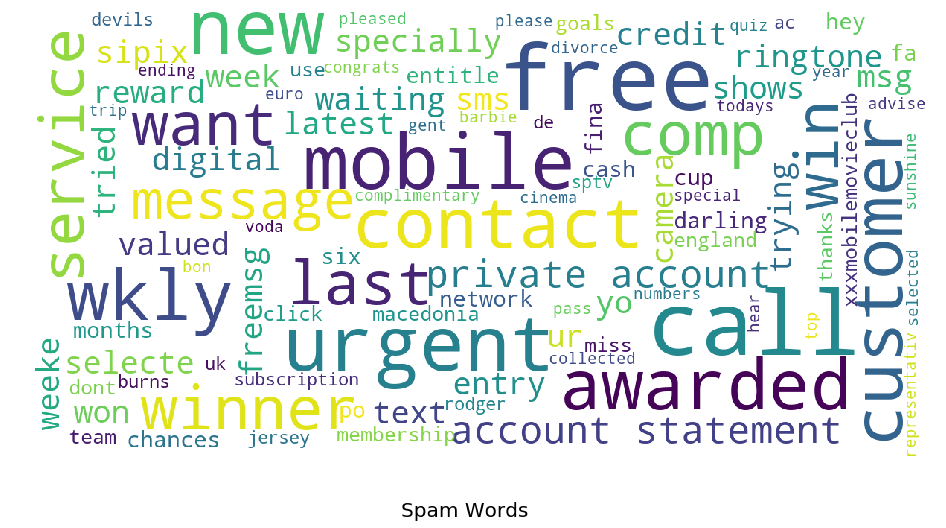

In [238]:
#Wordcloud when message is spam
ShowWordCloud(msgs[msgs.Label==1]['Message'],title='Spam Words')